In [1]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


# Transformada de Fourier


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import ipywidgets as ipw

## Revisao de Algebra Linear

### Espaços Vetoriais em $\mathbb{R}^N$ e em $\mathbb{C}^N$

Um espaço vetorial sobre $\mathbb{R}^N (\mathbb{C}^N)$ é um conjunto com as seguintes propriedades:


 - Um vetor $\textbf{x} \in \mathbb{R}^N (\mathbb{C}^N)$ pode ser escrito na forma $\textbf{x} = (x_0, x_1, x_2, ..., x_{N-1})$ onde $x_i \in \mathbb{R} (\mathbb{C})$ 
 - $\forall$  vetores $\textbf{u}, \textbf{v} \in \mathbb{R}^N (\mathbb{C}^N), \textbf{u} + \textbf{v} = (u_0 + v_0, u_1 + v_1, ..., u_{N-1} + v_{N-1}) \in \mathbb{R}^N (\mathbb{C}^N)$
 - $\forall$ vetor $\textbf{u} \in \mathbb{R}^N (\mathbb{C}^N)$ e escalar $c \in \mathbb{R}(\mathbb{C})$ temos um produto escalar $ c\textbf{u} = (c u_0, c u_1, ..., c u_{N-1}) \in \mathbb{R}^N (\mathbb{C}^N)$
 
- $\forall $ escalares $a, b \in \mathbb{R}(\mathbb{C})$ e vetores $\textbf{u}, \textbf{v}, \textbf{w} \in \mathbb{R}^N (\mathbb{C}^N)$ valem as seguintes regras aritmeticas:
 - $\textbf{u} + \textbf{v} = \textbf{v} + \textbf{u}$ (comutatividade)
 - $(\textbf{u} + \textbf{v}) + \textbf{w} = \textbf{u} + (\textbf{v} + \textbf{w})$ (associatividade)
 - $\exists$ um vetor nulo, $ \textbf{0}$, tal que $\textbf{u} + \textbf{0} = \textbf{0} + \textbf{u} = \textbf{u}$ (identidade na adicao)
 - $\forall \textbf{u} \in \mathbb{R}^N (\mathbb{C}^N)$,   $ \exists (-\textbf{u})$ tal que $\textbf{u} + (-\textbf{u}) = 0$ (inverso da adicao)
 - $(ab)\textbf{u} = a(b\textbf{u})$
 - $(a + b)\textbf u = a\textbf u + b\textbf u$
 - $a(\textbf u + \textbf{v}) = a\textbf u + a\textbf v$
 - $1\textbf{u} = \textbf u$

### Produto Interno e Ortogonalidade em $\mathbb{C}^N$

Exercitar um pouco a Algebra Linear de vetores com valores complexos pode ser muito util para conseguirmos mais intuicao a respeito da transformada de Fourier.

#### Produto Interno em $\mathbb{C}^N$ 

Dados dois vetores $\textbf u, \textbf v \in \mathbb{C}^N$ , definimos o produto interno $$\langle \textbf u, \textbf v \rangle = (\overline{u_0}v_0, \overline{u_1}v_1, ..., \overline{u_{N-1}}v_{N-1}) = \sum_{i = 0}^{N-1} \overline{u_i}v_i$$

Propriedades:

$\forall \textbf u, \textbf v, \textbf w \in \mathbb{C}^N$ e $a, b \in \mathbb{C}$ vale que:

- $\langle \textbf v, \textbf w \rangle = \overline{\langle \textbf w, \textbf v \rangle}$ (Simetria Conjugada)
- $\langle \textbf u,  a\textbf v + b\textbf w \rangle = a\langle \textbf u, \textbf v \rangle + b\langle \textbf u, \textbf w \rangle$ (linearidade no segundo argumento)
- $\langle \textbf v, \textbf v \rangle \ge 0$ de forma que $\langle \textbf v, \textbf v \rangle = 0 \leftrightarrow \textbf v = 0$



- (Corolario) Linearidade conjugada do primeiro argumento:

 - $\langle a\textbf u + b\textbf v, \textbf w \rangle = \overline{\langle \textbf w,  a\textbf u + b\textbf v \rangle} = \overline a \overline{\langle \textbf w, \textbf u \rangle} + \overline b \overline{\langle \textbf w, \textbf v \rangle} = \overline a \langle \textbf u, \textbf w \rangle + \overline b \langle \textbf v, \textbf w \rangle$
 
 
 

#### Norma em $\mathbb{C}^N$

A norma de um espaco vetorial em $\mathbb{C}^N$ se da por uma funcao $\lVert \cdot \rVert : \mathbb{C}^N \rightarrow \mathbb{R}$ com as seguintes prorpiedades:

$\forall \textbf v, \textbf w \in \mathbb{C}^N$, $a \in \mathbb{C}$

- $\lVert \textbf v \rVert \ge 0$, de forma que $\lVert \textbf v \rVert = 0 \leftrightarrow \textbf v = 0$
- $\lVert a\textbf v \rVert =\lvert a \rvert\lVert \textbf v\rVert$
- $\lVert \textbf v + \textbf w \rVert \le \lVert \textbf v \rVert + \lVert  \textbf w \rVert$ (desigualdade triangular)

(Relacao com produto interno)
- $\rVert \textbf v \rVert^2 = \langle \textbf v, \textbf v \rangle = (\lvert v_0 \rvert^2, \lvert v_1 \rvert^2, ..., \lvert v_{N-1} \rvert^2)$ (lembrando que $\lvert z\rvert^2 = z\overline{z}$, $ \forall z \in \mathbb{C}$)

#### Ortogonalidade em $\mathbb{C}^N$

Em Geometria Analitica, era possivel obter o angulo $\theta$ entre dois vetores (em $\mathbb{R}^2$ ou $\mathbb{R}^3$) utilizando a seguinte relacao: 

$$ \langle \textbf v, \textbf w \rangle = \lVert \textbf v\rVert\lVert\textbf w\rVert\cos(\theta)$$

Podemos concluir que, quando $\theta = \frac{\pi}{2}$, $cos(\theta) = 0$ $\therefore \langle\textbf v, \textbf w\rangle = 0$

Portanto, $\textbf v$ e $\textbf w$ sao ortoginais.

Esta ultima afirmacao pode ser generalizada para qualquer espaco vetorial com norma e produto interno: 
 - $\textbf v, \textbf w$ ortogonais $\leftrightarrow \langle\textbf v, \textbf w\rangle = 0$

#### Decomposicao em uma Base

Dado um conjunto de vetores $\{\textbf{e}_0, \textbf{e}_1, ..., \textbf{e}_{N-1}\}$ linearmente independentes, ou seja, existe uma unica solucao para

$$\sum_{k} c_k\textbf e_k = c_0\textbf e_0 + c_1\textbf e_1 + \cdots + c_{N-1}\textbf e_{N-1} = 0 \leftrightarrow c_k = 0, \forall k$$ (Solucao trivial)

dizemos entao que $\{\textbf{e}_k\}$ e uma base se dado um vetor $\textbf x$ podemos escrever, de forma unica:
$$\textbf x  =  \alpha_0\textbf{e}_0 +\alpha_1\textbf{e}_1 + \cdots + \alpha_{N-1}\textbf{e}_{N-1} = \sum_{k=0}^{N-1} \alpha_k\textbf e_k$$ 

#### Bases Ortogonais e Projecao em $\mathbb{C}^N$

Se uma base $\{\textbf{e}_k\}$ e ortogonal, temos que cada componente $\textbf e_k$ da base e ortogonal par a par, ou seja, $\langle \textbf e_m, \textbf e_n\rangle = 0$ para $m\ne n$

Dizemos tambem que $\alpha_k$ (coeficiente do vetor $\textbf x$ na direcao de $\textbf e_k$) e chamado de $\textit{projecao de }\textbf x$ $\textit{em}$ $\textbf e_k$ e pode ser obtido por:

$$\textbf x = \sum_{k=0}^{N-1} \alpha_k\textbf e_k$$

Fazemos o produto interno com uma componente da base:

$$ \langle\textbf x, \textbf e_m\rangle = \sum_{k=0}^{N-1} \alpha_k\langle\textbf e_k, \textbf e_m\rangle$$

Por ortogonalidade, vemos que o lado direito da equacao e zero para quase todos os termos da soma ($\langle\textbf e_k, \textbf e_m\rangle = 0, \forall k\ne m$), sobrando:

$$ \langle\textbf x, \textbf e_m\rangle = \alpha_m\langle\textbf e_m, \textbf e_m\rangle \therefore \alpha_m = \frac{\langle\textbf x, \textbf e_m\rangle}{\langle\textbf e_m, \textbf e_m\rangle} = \frac{\langle\textbf x, \textbf e_m\rangle}{\lVert\textbf e_m\rVert^2}$$

Por fim, a nossa equacao para decomposicao em uma base ortogonal se escreve:
$$\textbf x = \sum_{k=0}^{N-1} \frac{\langle\textbf x, \textbf e_k\rangle}{\lVert\textbf e_k\rVert^2}\textbf e_k$$


## A Base de Fourier

Quando estudamos analise de Fourier (e por consequencia transformadas de Fourier), estamos essencialmente olhando para uma certa funcao (ou sinal) projetada em uma certa base (de funcoes periodicas "basicas") em um certo espaco vetorial.

No nosso caso, a priori estaremos analisando um sinal, ou seja, uma funcao discreta (em $\mathbb{R}^N$ ou  $\mathbb{C}^N$), e sua decomposicao espectral em uma base de senos e cossenos (ou exponenciais complexas). 
Trabalhar com exponenciais complexas ou funcoes trigonometricas e essencialmente semelhante, pois podemos ir facilmente de uma base para outra utilizando a $\textit{Identidade de Euler}$ (com $\theta = \omega t$):

$$ e^{i\omega t} = \cos(\omega t) + i\sin(\omega t)$$
$$ e^{-i\omega t} = \cos(\omega t) - i\sin(\omega t)$$

ou reciprocamente:

$$\cos(\omega t) = \frac{e^{i\omega t} + e^{-i\omega t}}{2}$$
$$\sin(\omega t) = \frac{e^{i\omega t} - e^{-i\omega t}}{2i}$$



A Base de Fourier pode ser escrita, por fim, como:



### Numeros Complexos

In [5]:
z = 1 + 1j
w = 1j
print(z)
print(type(z))
print(abs(z))

print(np.absolute(z))
print(np.angle(z))
print(np.pi/4)
print(z*w)



(1+1j)
<class 'complex'>
1.4142135623730951
1.4142135623730951
0.7853981633974483
0.7853981633974483
(-1+1j)


### Projetando um sinal em uma componente da base de Fourier ("Correlacao")


Para ganharmos um pouco mais de intuicao da transformada de Fourier, vamos usar alguns sinais de teste, e analisar $\textit{correlacoes}$ deste sinal com um sinal de frequencia unica. Em processamento de sinais, um valor de correlacao e dado pelo produto interno ente os dois sinais. Normalizando a correlacao para valores entre 0 e 1, o processo de correlacao esta essencialmente $\textit{projetando}$ um sinal em $\mathbb{R}^N$ (ou $\mathbb{C}^N$) numa componente de uma base.

$$  \alpha_k = \frac{\langle\textbf x, \textbf e_k\rangle}{\lVert\textbf e_k\rVert^2} \simeq \frac{Corr_{\textbf e_k}(\textbf x)}{\lVert\textbf e_k\rVert^2}$$  

Primeiramente, vamos correlacionar os nossos sinais de teste com uma funcao senoidal discreta:



In [6]:
"""Sinais de Teste"""

def delta(dur=1, SR=48000):
    '''Gera um sinal de impulso com N amostras'''

    delta = np.zeros(dur*SR)
    delta[(dur*SR)//3] = 1.
    
    return delta

def sinetone(fHz, phi=0, dur=1, SR=48000):
    '''Gera uma onda senoidal'''
    return np.sin(2*np.pi*fHz*np.arange(0, dur, 1/SR)+phi)

def tritone(fHz, dur=1, SR=48000):
    '''Gera duas senoides com um 
    intervalo musical de tritono'''
    return sinetone(fHz, 0, dur, SR) + sinetone(np.sqrt(2)*fHz, 0, dur, SR)



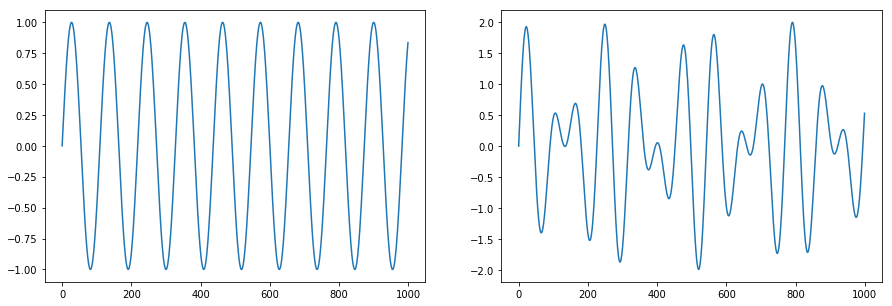

Correlacao Obtida: 1.0007234067966368


In [7]:
senoide = sinetone(440)
teste1 = tritone(440)


# -------------------------------
fig = plt.figure(figsize=[15, 5])

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(senoide[0:1000])
ax2.plot(teste1[0:1000])
plt.show()
# -------------------------------

corr1 = np.dot(senoide, teste1)
corr1 /= np.linalg.norm(senoide)**2

print('Correlacao Obtida:', corr1)

Colocamos essa correlacao em uma funcao:

In [8]:
def correlacao(x, e):
    return abs(np.dot(x, e)/(np.linalg.norm(e)**2))

In [10]:
'''Plotamos algumas correlacoes'''
# teste = tritone(440) # frequencias: 440 Hz e 622.25 Hz
# teste = sinetone(560)
# teste = sinetone(640)
teste = 1000*delta()


# print('Frequencia |   Correlacao')
# print('-----------|-------------')
# print('400Hz      |      %.5f' % (correlacao(teste, sinetone(400))))
# print('440Hz      |      %.5f' % (correlacao(teste, sinetone(440))))
# print('480Hz      |      %.5f' % (correlacao(teste, sinetone(480))))
# print('520Hz      |      %.5f' % (correlacao(teste, sinetone(520))))
# print('560Hz      |      %.5f' % (correlacao(teste, sinetone(560))))
# print('600Hz      |      %.5f' % (correlacao(teste, sinetone(600))))
# print('620Hz      |      %.5f' % (correlacao(teste, sinetone(620))))
# print('622Hz      |      %.5f' % (correlacao(teste, sinetone(622))))
# print('640Hz      |      %.5f' % (correlacao(teste, sinetone(640))))
# print('-------------------------')


freq_base = [400, 440, 480, 520, 560, 600, 622, 640]
print('Frequencia |   Correlacao')
print('-----------|-------------')
for f in freq_base:
    print('%.0fHz      |      %.5f' %(f, correlacao(teste, sinetone(f))))
print('-------------------------')

Frequencia |   Correlacao
-----------|-------------
400Hz      |      0.03608
440Hz      |      0.03608
480Hz      |      0.00000
520Hz      |      0.03608
560Hz      |      0.03608
600Hz      |      0.00000
622Hz      |      0.03608
640Hz      |      0.03608
-------------------------


### Uma base de exponenciais complexas

Considerando um sinal $x(t)$ definido no intervalo $[0, \tau)$ que foi amostrado nos instantes $\frac{n\tau}{N}$ formando o sinal digital $\textbf{x}(n)$

Pode-se mostrar que o sinal $x(t)$ pode ser decomposto em uma base infinita de exponenciais complexas da forma
$$\textbf e_k(t) = e^{2\pi ikt/\tau}$$, com $k \in \mathbb{Z}$
Por consequencia, as versoes discretizadas de $\textbf e_k(t)$, denominadas $\textbf E_k(n)$, se escrevem 
$$\textbf E_k(n) = e^{2\pi i k n/N}$$

### Exercicio:

 - escreva uma funcao que gera uma exponencial complexa $\textbf E_k$
 - gere um vetor de indices k entre 0 e N-1
 - calcule as correlacoes de um sinal teste com cada $\textbf E_k$
 - armazene o resultado das correlacoes em um array e plote o resultado

In [12]:
def exp_complexa(k, dur=1, SR=48000):
    return np.exp(2*np.pi*1j*k*np.arange(0, dur, 1/SR))

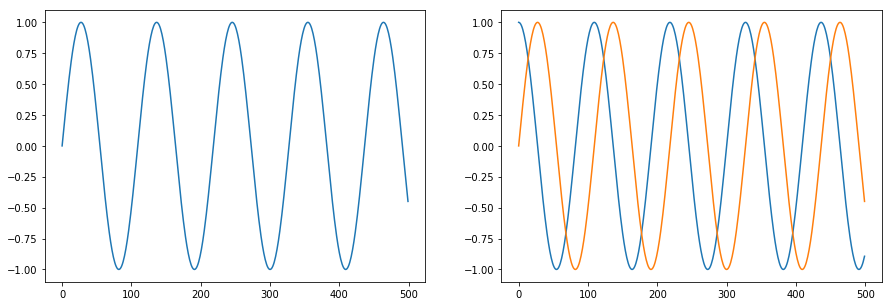

In [13]:
fig = plt.figure(figsize=[15, 5])

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


ax1.plot(sinetone(440)[0:500])
ax2.plot(np.real(exp_complexa(440)[0:500]))
ax2.plot(np.imag(exp_complexa(440)[0:500]))
plt.show()

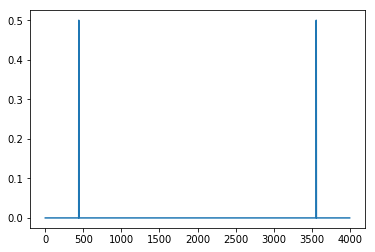

In [14]:
dur = 1
SR = 4000
N = SR*dur

K = np.arange(N)

Corr = np.zeros(N)
teste = sinetone(440, SR=SR)
for k in K:
    Corr[k] = correlacao(teste, exp_complexa(k, SR=SR))
    
plt.plot(Corr)
plt.show()

### Transformada Discreta de Fourier

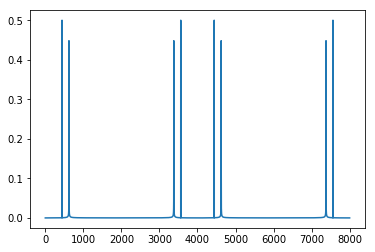

In [15]:
def DFT(x, SR=48000):
    
    N = len(x)
    K = np.arange(2*N)
    Corr = np.zeros(2*N)
    
    for k in K:
        Corr[k] = correlacao(x, exp_complexa(k, SR=SR))    
    
    return Corr

dur = 1
SR = 4000
x = tritone(440, SR=SR)

X = DFT(x, SR)
plt.plot(X)
plt.show()

In [ ]:
x1 = sinetone(440)
X1 = DFT(x1)

plt.plot(X1)

# FFT (Fast Fourier Transform)

In [74]:
def squaretone_alt(fHz, dur=1, SR=48000):
    N = dur*SR
    M = int(N/(2*fHz))
    print(M)
    vec = int(fHz)*(M*[1]+M*[-1])
    
    return vec

def squaretone(fHz, dur=1, SR=48000):
    '''Gera uma onda quadrada'''
    s = sinetone(fHz, 0, dur, SR)
    
    return 1*(s>=0.)-1*(s<=0.)


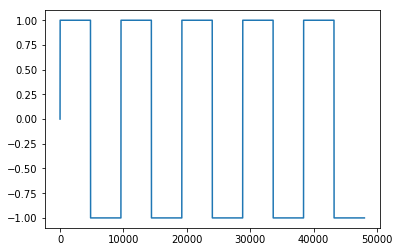

In [77]:
plt.plot(squaretone(5))
plt.show()

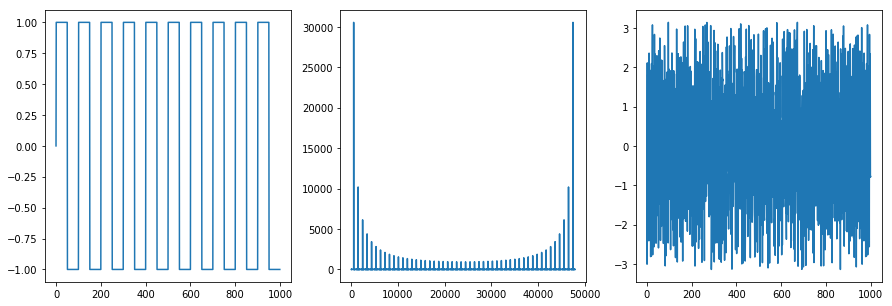

[  480 47520]
[-1.60159088  1.60159088]


In [142]:
x2 = squaretone(480)
X2 = np.fft.fft(x2)

plt.rcParams['figure.figsize'] = [15, 5]
plt.subplot(1, 3, 1)
plt.plot(x2[0:1000])
plt.subplot(1, 3, 2)
plt.plot(np.abs(X2))
plt.subplot(1, 3, 3)
plt.plot(np.angle(X2)[0:1000])
plt.show()


# Precisamos falar sobre a Fase
# indices=np.array([]).astype(int)
# for i in range(len(np.abs(X2))):
#     if np.abs(X2[i]) > 15000:
#         indices = np.append(indices, i)
        
# print(indices)
# print(np.angle(X2[indices]))

### Revisitando o Aliasing no Dominio Espectral

In [189]:
def FFT_INTERATIVO(freq=400):
    x = sinetone(freq)
    X = np.fft.fft(x)
    X = np.roll(X, len(X)//2) #esta linha, transforma o intervalo de [0, N) para [-N/2, N/2)
    X = 2*X[len(X)//2:len(X)] #soma as contribuicoes de frequencias negativas
    plt.rcParams['figure.figsize'] = [15, 5]
    plt.subplot(1, 3, 1)
    plt.plot(x[0:1000])
    plt.subplot(1, 3, 2)
    plt.plot(np.abs(X))
    plt.subplot(1, 3, 3)
    plt.plot(np.angle(X))
    plt.show()


In [190]:
ipw.interact(FFT_INTERATIVO, freq=(1, 55000, 1000))

interactive(children=(IntSlider(value=400, description='freq', max=55000, min=1, step=1000), Output()), _dom_c…

<function __main__.FFT_INTERATIVO(freq=400)>

### Plotando alguns sinais

In [212]:
def sawtone(fHz, dur=1, SR=48000):
    return sig.sawtooth(2*np.pi*fHz*np.arange(0, dur, 1/SR))
def steptone(samples, dur=1, SR=48000):
    step = np.zeros(int(dur*SR))
    step[0:samples] = 1
    return step

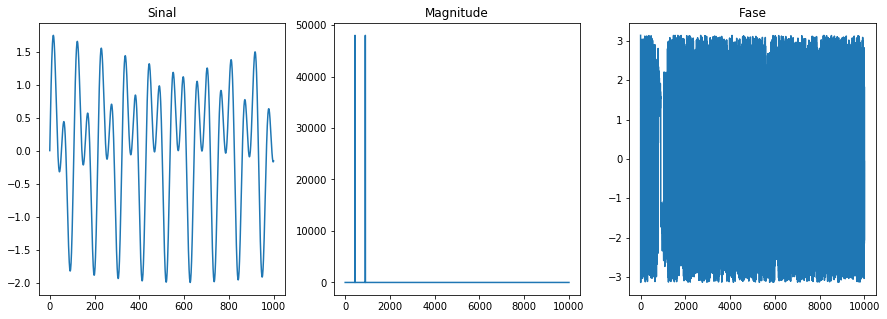

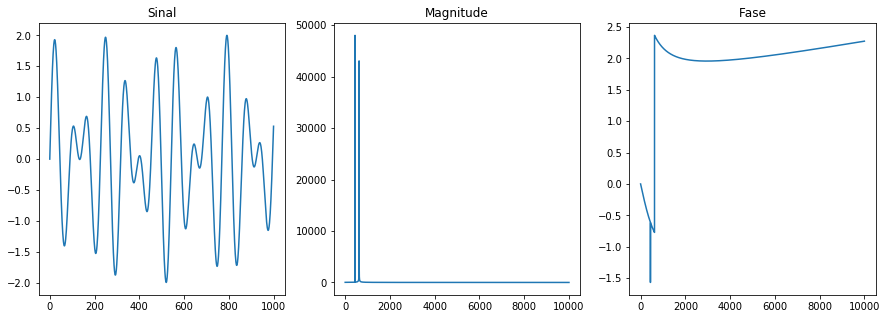

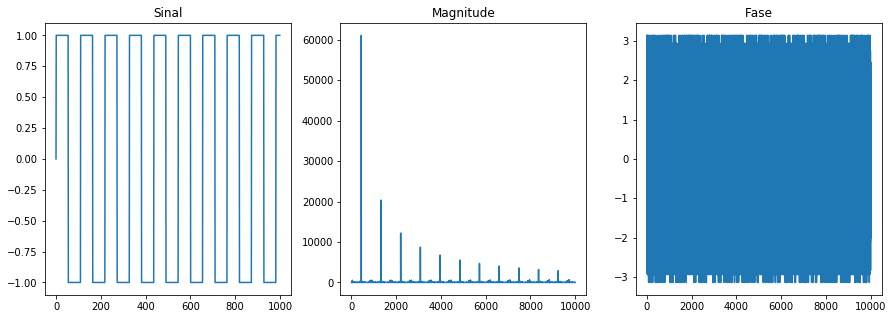

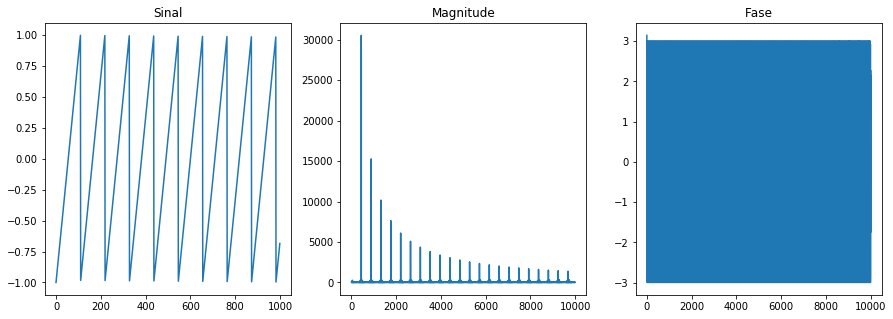

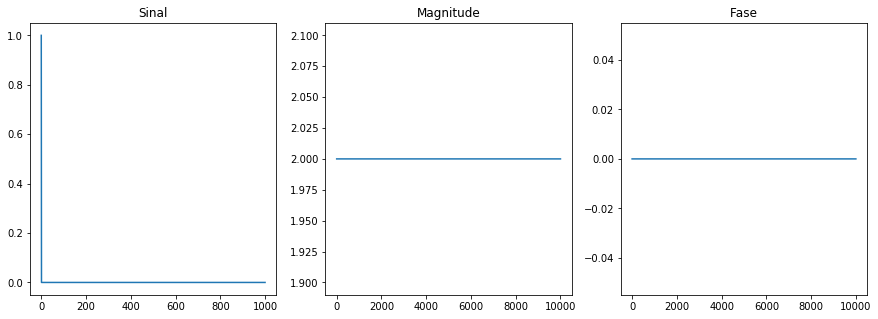

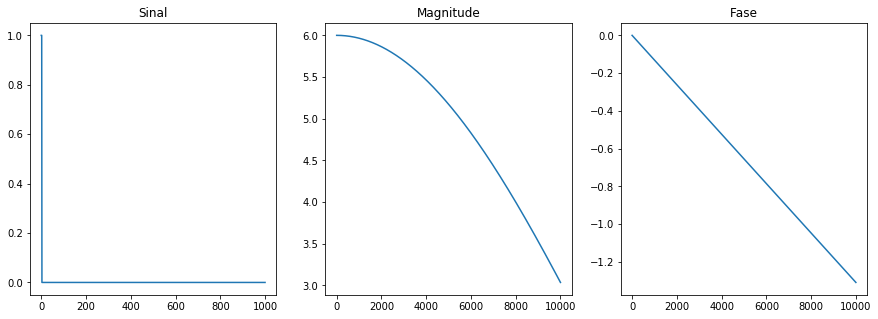

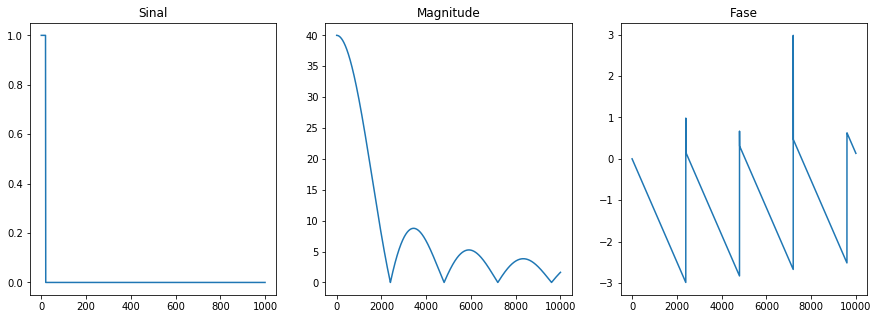

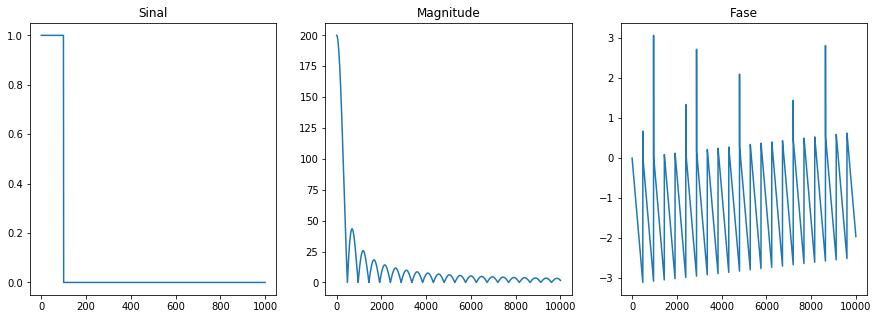

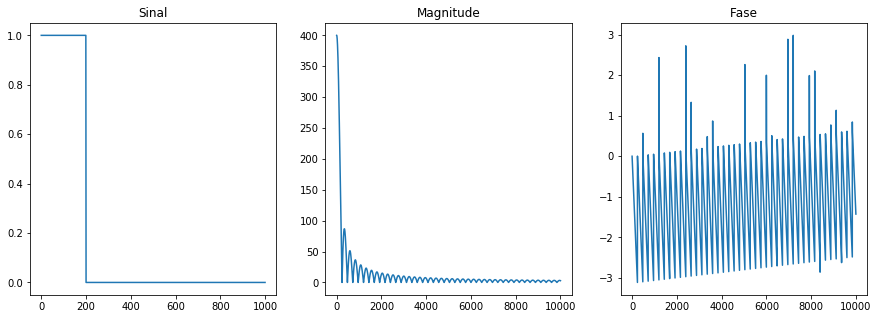

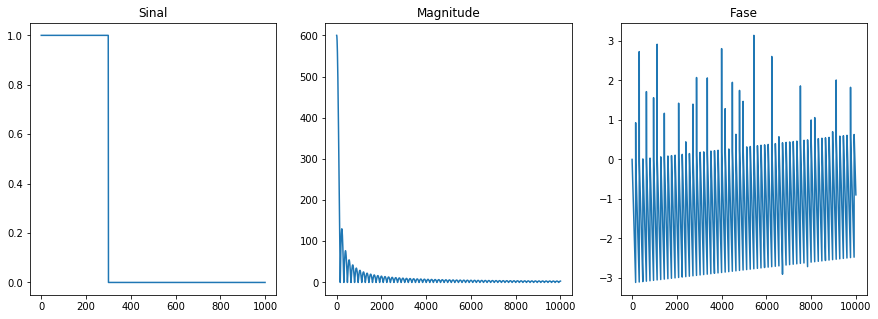

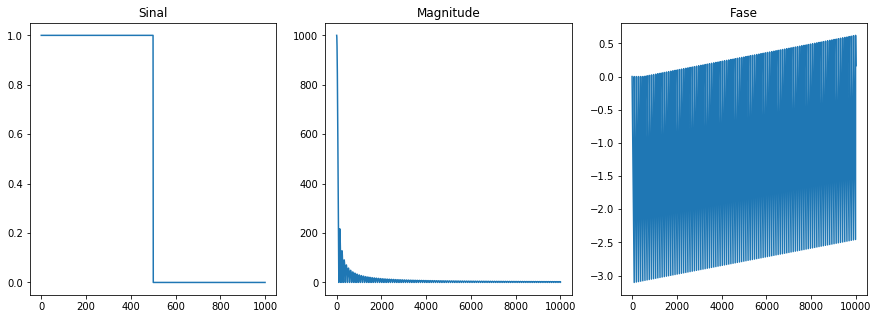

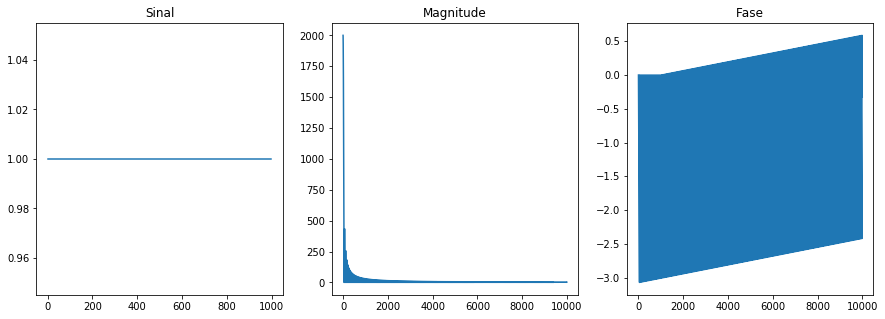

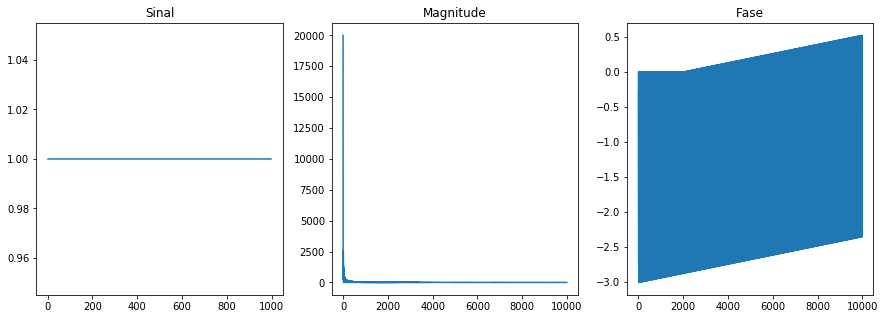

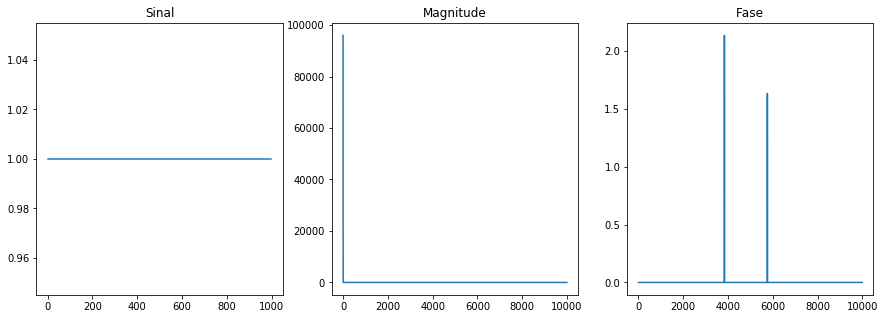

In [233]:
testes = np.array([sinetone(440)+sinetone(900), 
                   tritone(440), 
                   squaretone(440), 
                   sawtone(440), 
                   steptone(1), 
                   steptone(3), 
                   steptone(20), 
                   steptone(100), 
                   steptone(200), 
                   steptone(300),   
                   steptone(500), 
                   steptone(1000), 
                   steptone(10000), 
                   steptone(48000)])


for x in testes:
    X = np.fft.fft(x)
    X = np.roll(X, len(X)//2) #esta linha, transforma o intervalo de [0, N) para [-N/2, N/2)
    X = 2*X[len(X)//2:len(X)] #soma as contribuicoes de frequencias negativas
    plt.rcParams['figure.figsize'] = [15, 5]
    plt.subplot(1, 3, 1)
    plt.plot(x[0:1000])
    plt.title('Sinal')
    plt.subplot(1, 3, 2)
    plt.plot(np.abs(X)[0:10000])
    plt.title('Magnitude')
    plt.subplot(1, 3, 3)
    plt.plot(np.angle(X)[0:10000])
    plt.title('Fase')
    plt.show()
